In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print('Total number of passangers in the training data...', len(df))
print('Number of passangers  who survived...', len(df[df['Survived'] == 1]))
print("Number of passangers  who didn't survived...", len(df[df['Survived'] == 0]))

Total number of passangers in the training data... 891
Number of passangers  who survived... 342
Number of passangers  who didn't survived... 549


#### Percentage of men and women who survived

In [10]:
print(df['Sex'].value_counts())

print('Percentage of Male who Survived ',100 * np.mean(df['Survived'][df['Sex']== 'male']))
print('Percentage of Female who Survived ',100 * np.mean(df['Survived'][df['Sex'] == 'female']))

Sex
male      577
female    314
Name: count, dtype: int64
Percentage of Male who Survived  18.890814558058924
Percentage of Female who Survived  74.20382165605095


#### Survival Passenger by class

In [11]:
print(df['Pclass'].value_counts())

print('Percentage of Passengers who Survived in First Class ', 100 * np.mean(df['Survived'][df['Pclass'] == 1]))
print('Percentage of Passengers who Survived in Second Class ', 100 * np.mean(df['Survived'][df['Pclass'] == 2]))
print('Percentage of Passengers who Survived in Third Class ', 100 * np.mean(df['Survived'][df['Pclass'] == 3]))

print('\n',df[["Pclass", "Survived"]].groupby(['Pclass']).mean())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Percentage of Passengers who Survived in First Class  62.96296296296296
Percentage of Passengers who Survived in Second Class  47.28260869565217
Percentage of Passengers who Survived in Third Class  24.236252545824847

         Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


### Dealing with missing values

In [39]:
df2 = df.copy() 
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Filling the missing value by its mean using .fillna command

In [40]:
df2['Age'] = df2['Age'].fillna(np.mean(df2['Age']))

In [41]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Now handle Embarked column, as it only had 2 null values we either drop those rows or we can replace with the mode of the columns since its an object column.

In [42]:
# droping the coulumn
df2 = df2.drop('Embarked',axis=1)

In [43]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

#### Now in the end we will deal with Cabin column



In [44]:
df2['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [45]:
df2['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [46]:
df2['Cabin'].fillna(df2['Cabin'].mode()[0], inplace=True)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
dtype: int64

### Finally dataset is clean and this data is now ready for further processing like performing Exploratory Data Analysis 

# Exploratory Data Analysis

#### Bar Plot

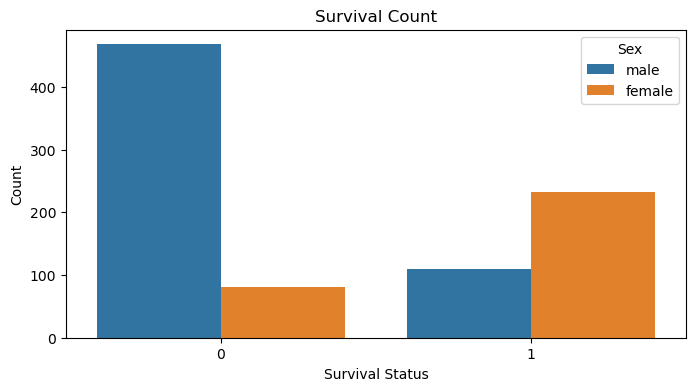

In [47]:
plt.figure(figsize=(8,4),dpi=100)

sns.countplot(x='Survived', data=df,hue='Sex')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')

plt.show()

### Histogram

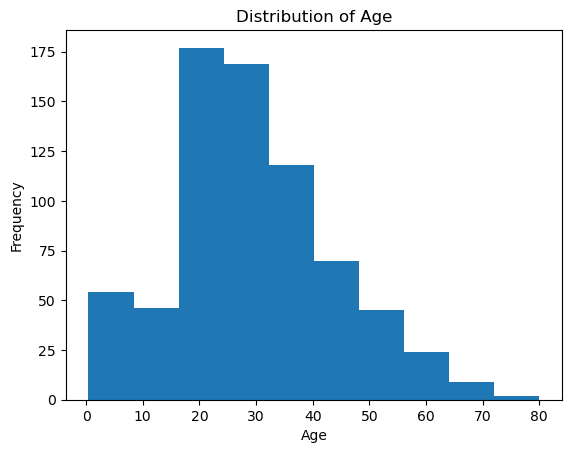

In [48]:

plt.hist(df['Age'], bins=10,)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.show()

#### Scatter Plot

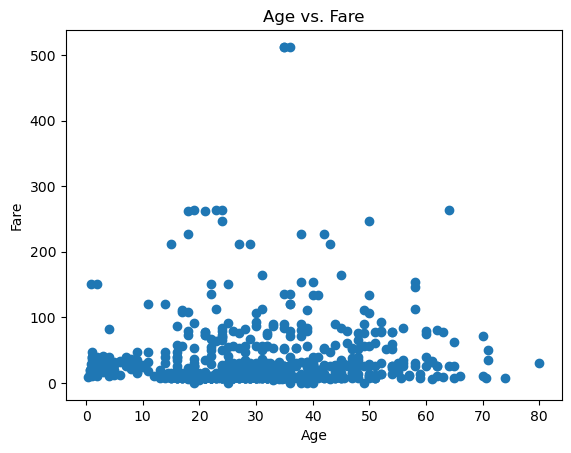

In [49]:
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

#### Box Plot

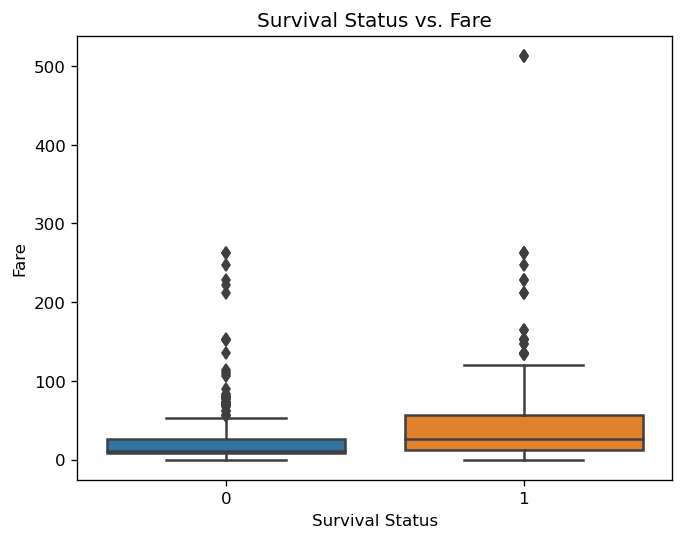

In [53]:
plt.figure(dpi=120)

sns.boxplot(x=df['Survived'], y=df['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

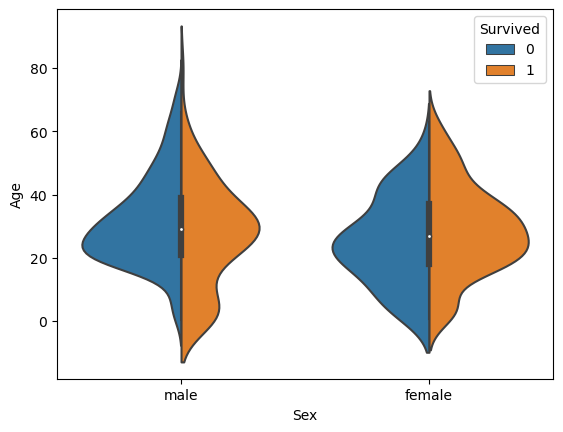

In [80]:
# Violinplot Displays distribution of data  
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True)

C:\Users\Guest1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


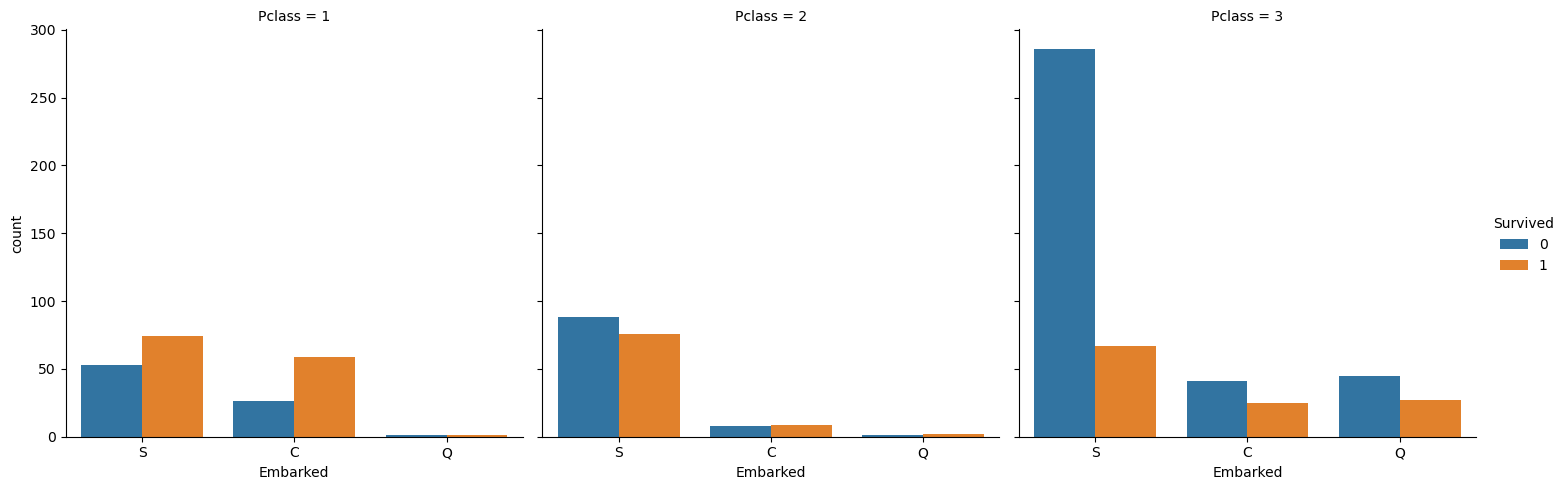

In [82]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = df)

## Exploring Relationship between variables

In [58]:
# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(df['Pclass'],df['Survived'])
print('\n',cross_tab)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000

 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [62]:
correlation = df[['Age', 'Survived']].corr()
print(correlation)

# Cross-tabulation
cross_tab = pd.crosstab(df['Embarked'],df['Survived'])
print('\n',cross_tab)

               Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000

 Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


In [78]:
# Correlation analysis

correlation = df[['SibSp', 'Fare']].corr()
print(correlation)


          SibSp      Fare
SibSp  1.000000  0.159651
Fare   0.159651  1.000000
